# Pharmacohophores with OpenPharmacophore

According to the IUPAC, a pharmacophore model is an ensemble of steric and electronic features that is necessary to ensure the optimal supramolecular interactions with a specific biological target and to trigger (or block) its biological response [1]. In pharmacophore modeling, the fundamental premise is that related chemical groups, such as hydrogen bond donors/ acceptors and aromatic/hydrophobic centers, if oriented in spatially and geometrically similar arrangements, can facilitate comparable intramolecular interactions with a target receptor, thereby conferring similar biological activity [3].

Pharmacophore models are mainly used in virtual screening, which involves computationally screening libraries of molecules to discover new hits, that is molecules that bind to a therapeutuc target of interest.

A pharmacophore model can be established either in a ligand based manner, by superposing a set of active molecules and extracting common chemical features that are essential for their bioactivity, or in a structure based manner, by probing possible interaction points between the macromolecular target and ligands [2].

OpenPharmacophore is a python library designed to work with pharmacophore models. It can derive pharmacophore models from ligand-based, structured-based and from molecular dynamics simulations and use them for virtual screening. In this notebook we will explore how pharmacophores work in OpenPharmacophore.

In [1]:
from openpharmacophore import Pharmacophore
from openpharmacophore import PharmacophoricPoint

import pyunitwizard as puw
import os

2021-11-03 14:55:21,678 [WARNING] [__init__.py:5] root: Warning: importing 'simtk.openmm' is deprecated.  Import 'openmm' instead.


## Creating a pharmacophore model manually

In OpenPharmacophore, a pharmacophore is an object that contains a list of pharmacophoric points. Pharmacophores can be obtained via ligand or structured based methods. However, the simplest way to create a pharmacophore is from a list of pharmacophoric points. Altough this is not really useful, it will help us understand how pharmacophore objects work in OpenPharmacophore.

### Pharmacophoric Points

In OpenPharmacophore, a pharmacophoric point is a chemical feature in 3D space, with a tolerance radius. A pharmacophoric point can be created from the PharmacophoricPoint class. To create a new pharmacophoric point, the feature type, the center and radius are required. A direction vector can be optionally passed to create a pharmacophoric point with directionality.

To begin, we will create an hydrogen bond donor, an aromatic ring and a positive charge pharmacophoric point. The constructor expects the center and radius to be quantities, for which we are using the pyunitwizard library.

In [2]:
donor = PharmacophoricPoint(feat_type="hb donor",
                           center=puw.quantity([1.0, 1.0, 1.0], "angstroms"),
                           radius=puw.quantity(1.5, "angstroms"),
                           direction=[0.5, 0.8, 0.2]
                           )

aromatic = PharmacophoricPoint(feat_type="aromatic ring",
                           center=puw.quantity([-1.0, 0.0, 2.0], "angstroms"),
                           radius=puw.quantity(1.0, "angstroms"),
                           direction=[0.5, 0.8, 0.2]
                              )

pos_charge = PharmacophoricPoint(feat_type="positive charge",
                           center=puw.quantity([0.0, -1.5, 2.0], "angstroms"),
                           radius=puw.quantity(1.75, "angstroms"),
                           )

print(donor, "\n")
print(aromatic, "\n")
print(pos_charge, "\n")

HbDonorSphereAndVector(center: (1.0, 1.0, 1.0); radius: 1.5; direction: (0.5185, 0.8296, 0.2074)) 

AromaticRingSphereAndVector(center: (-1.0, 0.0, 2.0); radius: 1.0; direction: (0.5185, 0.8296, 0.2074)) 

PositiveChargeSphere(center: (0.0, -1.5, 2.0); radius: 1.75) 



Pharmacophoric points can be of different types including: hydrogen bond donor and acceptors, aromatic rings, hydrophobic areas, positve and negative charges, and excluded and included volumes.

To see the list of accepted chemical features we can call the static method get_valid_features of the PharmacophoricPoint class

In [3]:
PharmacophoricPoint.get_valid_features()

['hb acceptor',
 'hb donor',
 'aromatic ring',
 'hydrophobicity',
 'positive charge',
 'negative charge',
 'excluded volume',
 'included volume']

Let's inspect a pharmacophoric point

In [4]:
print(f"Center is {donor.center}")
print(f"Radius is {donor.radius}")
print(f"Direction is {donor.direction}")
print(f"Feature name is {donor.feature_name}")

Center is [0.09999999999999999 0.09999999999999999 0.09999999999999999] nanometer
Radius is 0.15 nanometer
Direction is [0.51847585 0.82956136 0.20739034]
Feature name is hb donor


Pharmacophoric points can be modified after they been created.

In [5]:
new_center = puw.quantity([0.25, -1.15, 2.34], "angstroms")
donor.center = new_center
print(donor)

HbDonorSphereAndVector(center: (0.25, -1.15, 2.34); radius: 1.5; direction: (0.5185, 0.8296, 0.2074))


### Create the Pharmacophore

We are now ready to create a pharmacophore from the previosly defined points.

In [6]:
pharma_points = [donor, aromatic, pos_charge]
pharmacophore = Pharmacophore(pharma_points)
print(pharmacophore)
print(pharmacophore.elements)

Pharmacophore(n_elements: 3)
[HbDonorSphereAndVector(center: (0.25, -1.15, 2.34); radius: 1.5; direction: (0.5185, 0.8296, 0.2074)), AromaticRingSphereAndVector(center: (-1.0, 0.0, 2.0); radius: 1.0; direction: (0.5185, 0.8296, 0.2074)), PositiveChargeSphere(center: (0.0, -1.5, 2.0); radius: 1.75)]


Once we have created a pharmacophore, new pharmacophoric points can be added or removed

In [7]:
# Create a new hb acceptor and add it to the pharmacophore
acceptor = PharmacophoricPoint(
    feat_type="hb acceptor",
    center=puw.quantity([-1.20, -2.3, 0.5], "angstroms"),
    radius=puw.quantity(1.0, "angstroms")
)

pharmacophore.add_element(acceptor)

# Remove the positive charge
pos_charge_index = 2
pharmacophore.remove_elements(pos_charge_index)

print(f"{pharmacophore.n_elements} pharmacophoric points\n")
print(pharmacophore.elements, "\n")

3 pharmacophoric points

[HbDonorSphereAndVector(center: (0.25, -1.15, 2.34); radius: 1.5; direction: (0.5185, 0.8296, 0.2074)), AromaticRingSphereAndVector(center: (-1.0, 0.0, 2.0); radius: 1.0; direction: (0.5185, 0.8296, 0.2074)), HbAcceptorSphere(center: (-1.2, -2.3, 0.5); radius: 1.0)] 



We can visualize the pharmacophore using the show method, this will return an nglview widget. Pharmacophoric points are visualized as spheres and vectors if they have directionality. If a pharmacophore is associated with a molecular system it will also be shown. Nevertheless, in this case the pharmacophore does not contain a molecular system.

In [24]:
view = pharmacophore.show()
view

NGLWidget()

In [25]:
view.render_image()

Image(value=b'', width='99%')

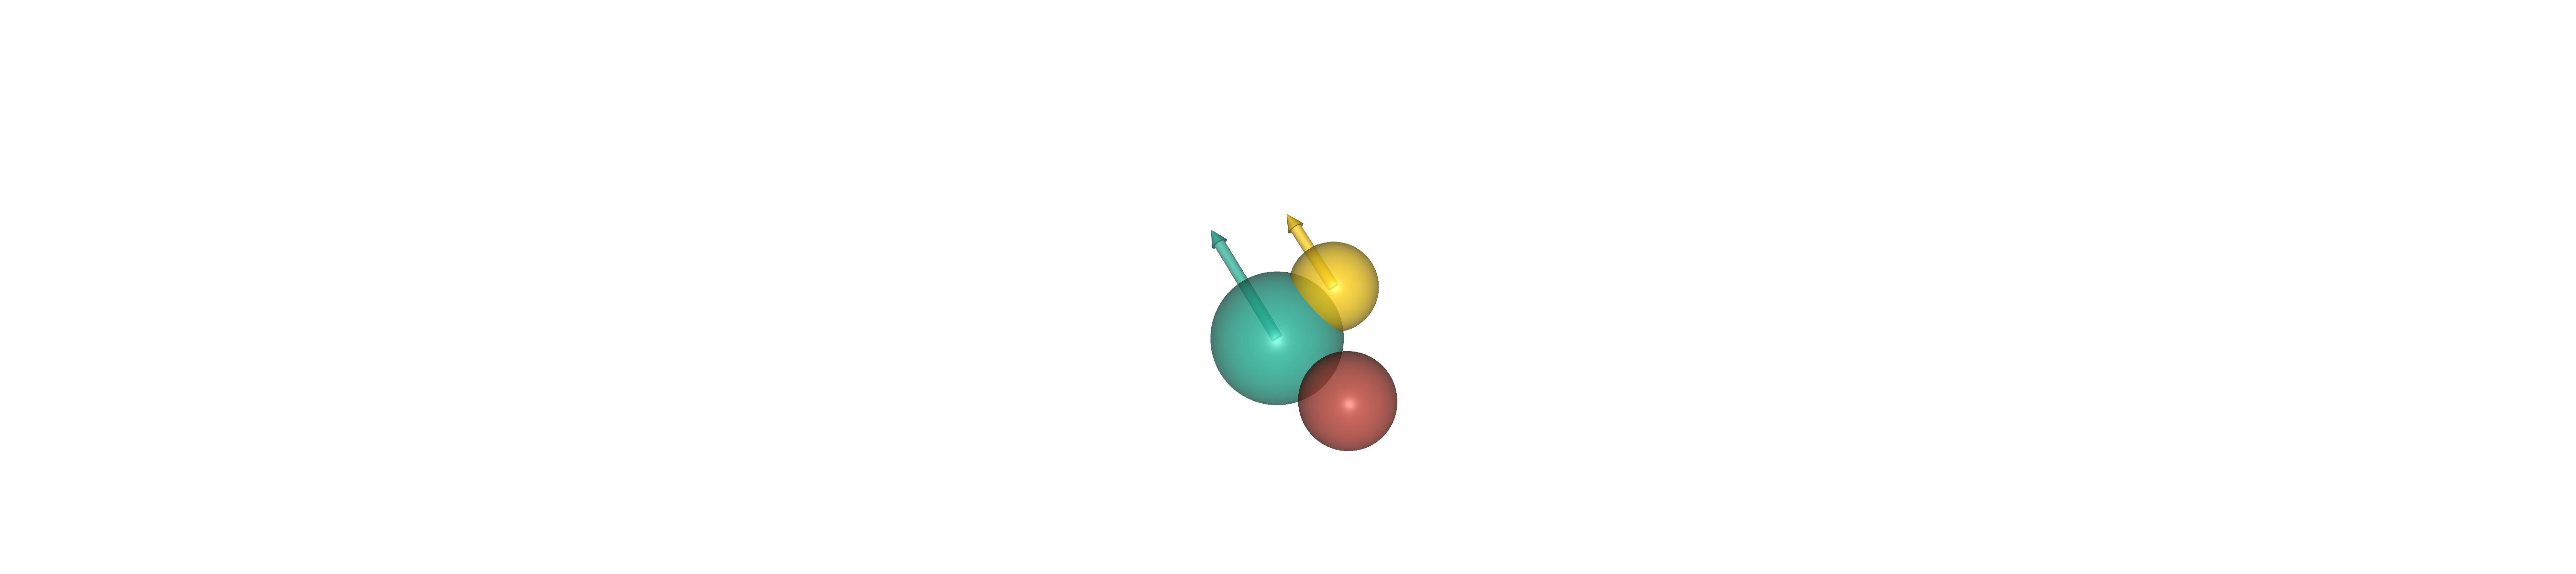

In [26]:
view._display_image()

## Importing Pharmacophores from other software

OpenPharmacophore can load pharmacophores generated with other software such as LigandScout, MOE, ZincPharmer and Pharmagist. It accepts a variety of different file formats inlcuding pml, ph4, json, and mol2.

In [10]:
# Load a pharmacophore from LigandScout (pml format).
data_dir = "./data/pharmacophores"
pharma_file = "ligscout-pharma.pml"

file = os.path.join(data_dir, pharma_file)

ligscout_pharmacophore = Pharmacophore().from_file(file)
print(ligscout_pharmacophore)
print(ligscout_pharmacophore.elements)

Pharmacophore(n_elements: 4)
[NegativeChargeSphere(center: (-8.0, 10.0, -9.5); radius: 1.5), HbDonorSphereAndVector(center: (-8.0, 2.0, -10.0); radius: 1.5; direction: (-0.4741, 0.0485, -0.8791)), AromaticRingSphereAndVector(center: (0.0, 6.5, -3.0); radius: 1.5; direction: (-0.8987, 0.4144, 0.1436)), ExcludedVolumeSphere(center: (5.5, 4.5, -2.0); radius: 1.0)]


In [11]:
# Load a pharmacophore from pharmer (json format).
pharma_file = "1M70.json"

file = os.path.join(data_dir, pharma_file)

pharmer_pharmacophore = Pharmacophore().from_file(file)
print(pharmer_pharmacophore)
print(pharmer_pharmacophore.elements)

Pharmacophore(n_elements: 5)
[HbAcceptorSphereAndVector(center: (21.352, -14.531, 19.625); radius: 1.0; direction: (-0.6406, 0.7029, -0.3091)), HbAcceptorSphereAndVector(center: (19.355, -18.32, 23.987); radius: 1.0; direction: (0.6859, 0.0909, 0.722)), HbDonorSphereAndVector(center: (20.977, -16.951, 18.746); radius: 1.0; direction: (0.7166, -0.5203, -0.4645)), NegativeChargeSphere(center: (21.669, -15.0777, 20.6083); radius: 1.5), NegativeChargeSphere(center: (19.985, -19.4044, 22.8422); radius: 2.0)]


In [21]:
view = pharmer_pharmacophore.show()
view

NGLWidget()

In [23]:
view.render_image()

Image(value=b'', width='99%')

In [14]:
# Load a pharmacophore from moe (ph4 format).
pharma_file = "gmp.ph4"

file = os.path.join(data_dir, pharma_file)

moe_pharmacophore = Pharmacophore().from_file(file)
print(moe_pharmacophore)
print(moe_pharmacophore.elements)

Pharmacophore(n_elements: 10)
[HbDonorSphere(center: (1.71, 1.4307, -1.4255); radius: 0.51), HydrophobicitySphere(center: (2.7895, 2.4035, -1.4087); radius: 0.55), HbAcceptorSphere(center: (0.312, 3.0175, -2.4482); radius: 0.57), AromaticRingSphere(center: (-0.7485, 2.1311, -2.4904); radius: 0.58), AromaticRingSphere(center: (-1.7196, -0.0273, -2.0556); radius: 0.6), AromaticRingSphere(center: (5.2003, 1.2548, -0.199); radius: 0.61), HbAcceptorSphere(center: (-1.9588, 2.536, -3.0362); radius: 0.62), HydrophobicitySphere(center: (-1.5472, -2.9794, -0.9619); radius: 0.74), HbAcceptorSphere(center: (-0.7551, 6.3286, -3.9676); radius: 1.25), AromaticRingSphere(center: (-0.7551, 6.3286, -3.9676); radius: 1.25)]


In [15]:
# Load a pharmacophore from pharmagist (mol2 format).
pharma_file = "elastase.mol2"

file = os.path.join(data_dir, pharma_file)

pharmagist_pharmacophore = Pharmacophore().from_file(file)
print(pharmagist_pharmacophore)
print(pharmagist_pharmacophore.elements)

Pharmacophore(n_elements: 4)
[HbAcceptorSphere(center: (-1.6995, 1.7377, -1.345); radius: 1.0), HbAcceptorSphere(center: (-1.7963, -1.8827, -2.8994); radius: 1.0), AromaticRingSphere(center: (-5.1291, 1.9117, 0.7651); radius: 1.0), HydrophobicitySphere(center: (0.8742, -0.6313, 0.4179); radius: 1.0)]


## Exporting Pharmacophores
Pharmacophores can also be saved to different file formats. Let's save the pharmacophore that we created at the beginning of the tutorial.

In [16]:
pharmacophore.to_ligandscout("./mypharmacophore.pml") 
pharmacophore.to_pharmer("./mypharmacophore.json") 
pharmacophore.to_pharmagist("./mypharmacophore.mol2")
pharmacophore.to_moe("./mypharmacophore.ph4") 

<strong>References</strong>

[1] Wermuth, C.G. et al. (1998) Glossary of terms used in medicinal chemistry (IUPAC Recommendations 1997). Annu. Rep. Med. Chem. 33, 385–395

[2] Yang, Sheng-Yong. "Pharmacophore modeling and applications in drug discovery: challenges and recent advances." Drug discovery today 15, no. 11-12 (2010): 444-450.

[3] Cournia, Zoe, Bryce K. Allen, Thijs Beuming, David A. Pearlman, Brian K. Radak, and Woody Sherman. "Rigorous free energy simulations in virtual screening." Journal of Chemical Information and Modeling 60, no. 9 (2020): 4153-4169.